In [1]:

import pandas as pd
import numpy as np

df_tourismus = pd.read_csv("tourismus_sh_monate_filled.csv", sep=";")


/tmp/ipykernel_8832/3153167905.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_yticklabels([f'{int(y):,}' for y in bar_plot.get_yticks()])


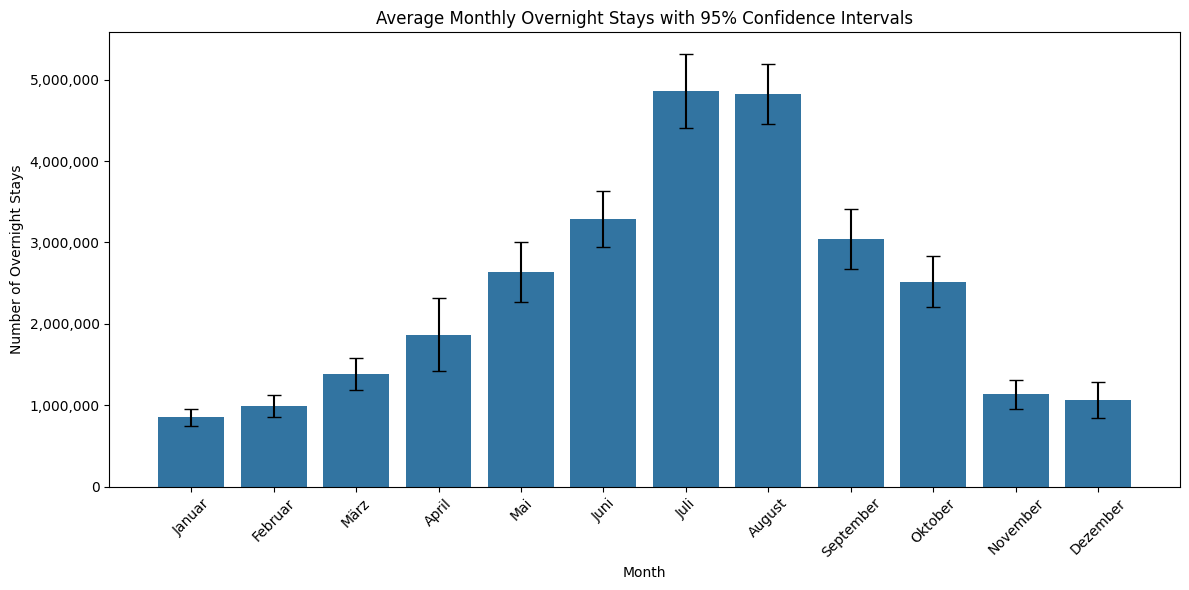

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define month order in German
month_order = ['Januar', 'Februar', 'März', 'April', 'Mai', 'Juni', 
               'Juli', 'August', 'September', 'Oktober', 'November', 'Dezember']

# Calculate mean and confidence intervals by month
monthly_stats = df_tourismus.groupby('Monat')['Uebernachtungen'].agg(['mean', 'std']).reset_index()
monthly_stats['Monat'] = pd.Categorical(monthly_stats['Monat'], categories=month_order, ordered=True)
monthly_stats = monthly_stats.sort_values('Monat')
monthly_stats['ci'] = 1.96 * monthly_stats['std'] / np.sqrt(len(df_tourismus['Jahr'].unique()))

# Create the bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=monthly_stats, x='Monat', y='mean')

# Add error bars for confidence intervals
plt.errorbar(x=range(len(monthly_stats)), 
             y=monthly_stats['mean'],
             yerr=monthly_stats['ci'],
             fmt='none',
             color='black',
             capsize=5)

# Change y scale to show numbers directly
bar_plot.set_yticklabels([f'{int(y):,}' for y in bar_plot.get_yticks()])

plt.title('Average Monthly Overnight Stays with 95% Confidence Intervals')
plt.xlabel('Month')
plt.ylabel('Number of Overnight Stays')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()